# CorynegNet

In [1]:
import pandas as pd

coryneregnet_trn = pd.read_csv("./data/regulation/trn_coryneregnet.csv",index_col=0)
coryneregnet_trn.head()

,target,sign,data_type
regulator,,,
Cgl0010,Cgl1011,1,CoryNeRegNet
Cgl0010,Cgl1015,1,CoryNeRegNet
Cgl0010,Cgl1017,1,CoryNeRegNet
Cgl0010,Cgl1222,1,CoryNeRegNet
Cgl0010,Cgl1223,1,CoryNeRegNet


# Regprecise

In [2]:
import pandas as pd

trn_regprecise = pd.read_csv("./data/regulation/trn_regprecise.csv",index_col=0)
trn_regprecise.head()

,target,sign,data_type
regulator,,,
Cgl1541,Cgl1540,-1,RegPrecise
Cgl0863,Cgl0075,-1,RegPrecise
Cgl0863,Cgl0076,-1,RegPrecise
Cgl0863,Cgl0084,-1,RegPrecise
Cgl0863,Cgl0183,-1,RegPrecise


# iModulon

In [3]:
trn_iModulon = pd.read_csv("./data/regulation/trn_iModulon.csv",index_col=0)
trn_iModulon.head()

,target,sign,data_type
regulator,,,
Cgl2612,Cgl0060,-1,iModulon
Cgl2612,Cgl0061,-1,iModulon
Cgl2612,Cgl0062,-1,iModulon
Cgl0863,Cgl0078,-1,iModulon
Cgl0863,Cgl0091,-1,iModulon


# Data Comparison   

In [4]:
trn_df = coryneregnet_trn.copy()
new_rows = pd.DataFrame(columns=trn_df.columns)
trn_df["regulator"] = trn_df.index
trn_regprecise["regulator"] = trn_regprecise.index
for index, row in trn_regprecise.iterrows():
    if not ((trn_df['regulator'] == row['regulator']) & (trn_df['target'] == row['target'])).any():
        new_rows = pd.concat([new_rows, pd.DataFrame([row], columns=trn_df.columns)])
new_rows = new_rows[trn_df.columns]
trn_df = pd.concat([trn_df, new_rows], ignore_index=True)
trn_df = trn_df.set_index("regulator")

new_rows = pd.DataFrame(columns=trn_df.columns)
trn_df["regulator"] = trn_df.index
trn_iModulon["regulator"] = trn_iModulon.index
for index, row in trn_iModulon.iterrows():
    if not ((trn_df['regulator'] == row['regulator']) & (trn_df['target'] == row['target'])).any():
        new_rows = pd.concat([new_rows, pd.DataFrame([row], columns=trn_df.columns)])

new_rows = new_rows[trn_df.columns]
trn_df = pd.concat([trn_df, new_rows], ignore_index=True)
trn_df = trn_df.set_index("regulator")

trn_df.to_csv("./analysis/regulation/trn_combine_final.csv")

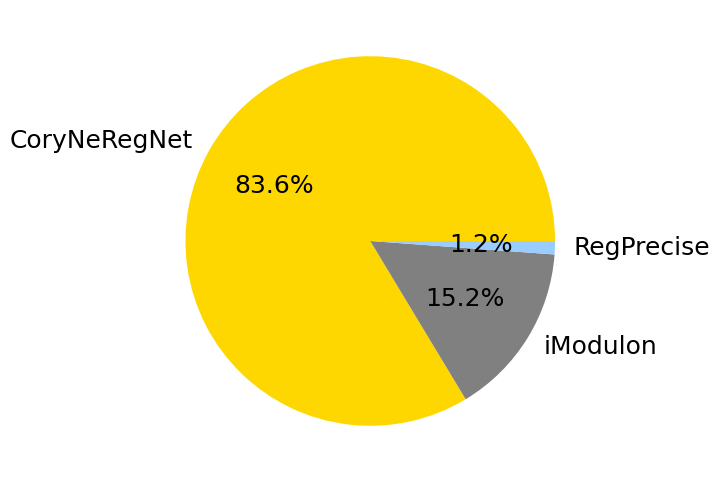

In [5]:
import matplotlib.pyplot as plt
#plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
light_blue = '#99ccff'
data_type_counts = trn_df['data_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(data_type_counts, labels=data_type_counts.index, autopct='%1.1f%%', colors=['gold', 'grey', light_blue])
plt.title('')
plt.savefig("./analysis/figure/all_source_boxplot_trn.png", dpi=300, bbox_inches='tight')

plt.show()